In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Работа с временем в python

#### Datetime

In [4]:
from datetime import datetime

In [5]:
dt = datetime(year=2021, month=3, day=1, hour=18, minute=30)

In [6]:
dt

datetime.datetime(2021, 3, 1, 18, 30)

In [7]:
dt.year, dt.month, dt.second, dt.minute, dt.hour

(2021, 3, 0, 30, 18)

In [8]:
str(dt)

'2021-03-01 18:30:00'

In [9]:
# кастомный формат вывода

datetime.strftime(dt, '%d-%m-%Y %H:%M:%S')

'01-03-2021 18:30:00'

In [10]:
# получить datetime из строки
datetime.strptime('01-03-2021 18:30:00', '%d-%m-%Y %H:%M:%S')

datetime.datetime(2021, 3, 1, 18, 30)

#### Timestamp

Количество секунд прошедших с 1 января 1970 года 00:00:00

In [11]:
123401234

123401234

In [12]:
dt.timestamp()

1614601800.0

In [13]:
dt.fromtimestamp(1)

datetime.datetime(1970, 1, 1, 6, 0, 1)

In [14]:
dt.utcfromtimestamp(1)

datetime.datetime(1970, 1, 1, 0, 0, 1)

#### Timedelta

In [15]:
from datetime import timedelta

In [16]:
dt2 = datetime(year=2021, month=3, day=1, hour=21, minute=30)

In [17]:
delta = dt2 - dt

In [18]:
delta

datetime.timedelta(seconds=10800)

In [19]:
timedelta(minutes=15, hours=1, days=3)

datetime.timedelta(days=3, seconds=4500)

#### iso8601 - международный формат

In [20]:
# международный формат даты/времени iso8601
dt.isoformat()

'2021-03-01T18:30:00'

In [21]:
# международный формат duration
'P1D'
'PT1H'
'PT3M'
'P1DT1H3M'

'P1DT1H3M'

In [22]:
import isodate

isodate.parse_duration('P1DT1H3M')

datetime.timedelta(days=1, seconds=3780)

### Работа с временем в pandas

In [23]:
pd.to_datetime('2021')

Timestamp('2021-01-01 00:00:00')

In [24]:
pd.to_datetime('2021-01-01T12:01:01')

Timestamp('2021-01-01 12:01:01')

In [25]:
pd.to_datetime(['2021-01-01', '2021-01-02', '2021-01-03'])

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq=None)

In [26]:
pd.date_range(start='2021-03-01T18:30', end='2021-03-01T21:30', freq='min')

DatetimeIndex(['2021-03-01 18:30:00', '2021-03-01 18:31:00',
               '2021-03-01 18:32:00', '2021-03-01 18:33:00',
               '2021-03-01 18:34:00', '2021-03-01 18:35:00',
               '2021-03-01 18:36:00', '2021-03-01 18:37:00',
               '2021-03-01 18:38:00', '2021-03-01 18:39:00',
               ...
               '2021-03-01 21:21:00', '2021-03-01 21:22:00',
               '2021-03-01 21:23:00', '2021-03-01 21:24:00',
               '2021-03-01 21:25:00', '2021-03-01 21:26:00',
               '2021-03-01 21:27:00', '2021-03-01 21:28:00',
               '2021-03-01 21:29:00', '2021-03-01 21:30:00'],
              dtype='datetime64[ns]', length=181, freq='min')

In [27]:
pd.date_range(freq='h', periods=4, start='2021-03-01T18:30')

DatetimeIndex(['2021-03-01 18:30:00', '2021-03-01 19:30:00',
               '2021-03-01 20:30:00', '2021-03-01 21:30:00'],
              dtype='datetime64[ns]', freq='h')

### Pandas Series
#### Для одномерных временных рядов в питоне лучше всего подходит структура класса pandas Series. Позволяет из коробки рисовать временные ряды, делать сложные слайсы. Будучи частью pandas, совместима со всем ML стеком питона.

In [28]:
ts = pd.Series(np.random.rand(100), pd.date_range(start='2019-11-26', periods=100))

<Axes: >

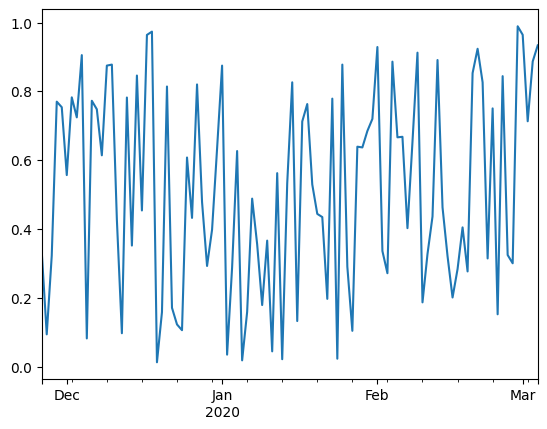

In [29]:
ts.plot()

<Axes: >

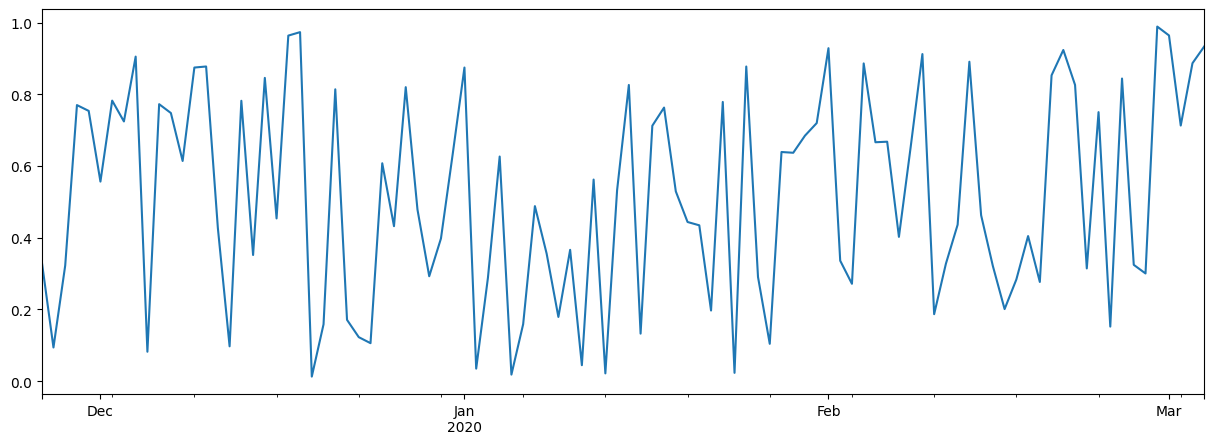

In [30]:
ts.plot(figsize=(15, 5))

In [31]:
# index select
ts[0]

/var/folders/xk/304zh5617yn50x0ys84shn5m0000gn/T/ipykernel_65301/1533320414.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ts[0]


0.33488366130616154

In [32]:
# datetime select
ts['2019-11-26']

0.33488366130616154

In [33]:
# index slice
ts[0:5]

2019-11-26    0.334884
2019-11-27    0.093932
2019-11-28    0.322569
2019-11-29    0.770034
2019-11-30    0.753835
Freq: D, dtype: float64

In [34]:
# datetime slice
ts['2019-11-26':'2019-11-29']

2019-11-26    0.334884
2019-11-27    0.093932
2019-11-28    0.322569
2019-11-29    0.770034
Freq: D, dtype: float64

In [35]:
# month, year slices

In [36]:
ts['2019-12']

2019-12-01    0.556678
2019-12-02    0.782500
2019-12-03    0.724413
2019-12-04    0.905246
2019-12-05    0.082066
2019-12-06    0.772599
2019-12-07    0.747880
2019-12-08    0.614110
2019-12-09    0.874754
2019-12-10    0.877690
2019-12-11    0.427196
2019-12-12    0.097147
2019-12-13    0.782064
2019-12-14    0.351902
2019-12-15    0.845921
2019-12-16    0.453885
2019-12-17    0.963852
2019-12-18    0.973524
2019-12-19    0.012786
2019-12-20    0.158575
2019-12-21    0.814057
2019-12-22    0.171057
2019-12-23    0.122745
2019-12-24    0.105971
2019-12-25    0.607761
2019-12-26    0.432278
2019-12-27    0.820046
2019-12-28    0.478625
2019-12-29    0.292642
2019-12-30    0.398068
2019-12-31    0.633430
Freq: D, dtype: float64

In [37]:
ts['2019']

2019-11-26    0.334884
2019-11-27    0.093932
2019-11-28    0.322569
2019-11-29    0.770034
2019-11-30    0.753835
2019-12-01    0.556678
2019-12-02    0.782500
2019-12-03    0.724413
2019-12-04    0.905246
2019-12-05    0.082066
2019-12-06    0.772599
2019-12-07    0.747880
2019-12-08    0.614110
2019-12-09    0.874754
2019-12-10    0.877690
2019-12-11    0.427196
2019-12-12    0.097147
2019-12-13    0.782064
2019-12-14    0.351902
2019-12-15    0.845921
2019-12-16    0.453885
2019-12-17    0.963852
2019-12-18    0.973524
2019-12-19    0.012786
2019-12-20    0.158575
2019-12-21    0.814057
2019-12-22    0.171057
2019-12-23    0.122745
2019-12-24    0.105971
2019-12-25    0.607761
2019-12-26    0.432278
2019-12-27    0.820046
2019-12-28    0.478625
2019-12-29    0.292642
2019-12-30    0.398068
2019-12-31    0.633430
Freq: D, dtype: float64

In [38]:
for attr in dir(ts):
    if not attr.startswith('_'):
        print(attr)

T
abs
add
add_prefix
add_suffix
agg
aggregate
align
all
any
apply
argmax
argmin
argsort
array
asfreq
asof
astype
at
at_time
attrs
autocorr
axes
backfill
between
between_time
bfill
bool
case_when
clip
combine
combine_first
compare
convert_dtypes
copy
corr
count
cov
cummax
cummin
cumprod
cumsum
describe
diff
div
divide
divmod
dot
drop
drop_duplicates
droplevel
dropna
dtype
dtypes
duplicated
empty
eq
equals
ewm
expanding
explode
factorize
ffill
fillna
filter
first
first_valid_index
flags
floordiv
ge
get
groupby
gt
hasnans
head
hist
iat
idxmax
idxmin
iloc
index
infer_objects
info
interpolate
is_monotonic_decreasing
is_monotonic_increasing
is_unique
isin
isna
isnull
item
items
keys
kurt
kurtosis
last
last_valid_index
le
list
loc
lt
map
mask
max
mean
median
memory_usage
min
mod
mode
mul
multiply
name
nbytes
ndim
ne
nlargest
notna
notnull
nsmallest
nunique
pad
pct_change
pipe
plot
pop
pow
prod
product
quantile
radd
rank
ravel
rdiv
rdivmod
reindex
reindex_like
rename
rename_axis
reorder_levels

In [39]:
# Из минусов - не самая быстрая структура данных

In [40]:
ts

2019-11-26    0.334884
2019-11-27    0.093932
2019-11-28    0.322569
2019-11-29    0.770034
2019-11-30    0.753835
                ...   
2020-02-29    0.989028
2020-03-01    0.964301
2020-03-02    0.713039
2020-03-03    0.886861
2020-03-04    0.933564
Freq: D, Length: 100, dtype: float64

In [41]:
ts.diff()

2019-11-26         NaN
2019-11-27   -0.240952
2019-11-28    0.228638
2019-11-29    0.447465
2019-11-30   -0.016199
                ...   
2020-02-29    0.688645
2020-03-01   -0.024727
2020-03-02   -0.251262
2020-03-03    0.173822
2020-03-04    0.046702
Freq: D, Length: 100, dtype: float64